In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils import init_plotting

In [2]:
W = init_plotting(latex=True, sans=True)

In [3]:
G = 6.674e-11  # Gravitational constant [N m^2 kg^-2]
M = 1.99e30    # Mass of the sun [kg]
data = pd.DataFrame({
    'a': [57.9, 108.2, 149.6, 227.9, 778.3, 1426.7, 2870.7, 4498.4],  # Semi-major axis [10^6 km]
    'T': [88.0, 224.7, 365.2, 687.0, 4331, 10_747, 30_589, 59_800]    # Orbital period [days]
})
data

,a,T
0,57.9,88.0
1,108.2,224.7
2,149.6,365.2
3,227.9,687.0
4,778.3,4331.0
5,1426.7,10747.0
6,2870.7,30589.0
7,4498.4,59800.0


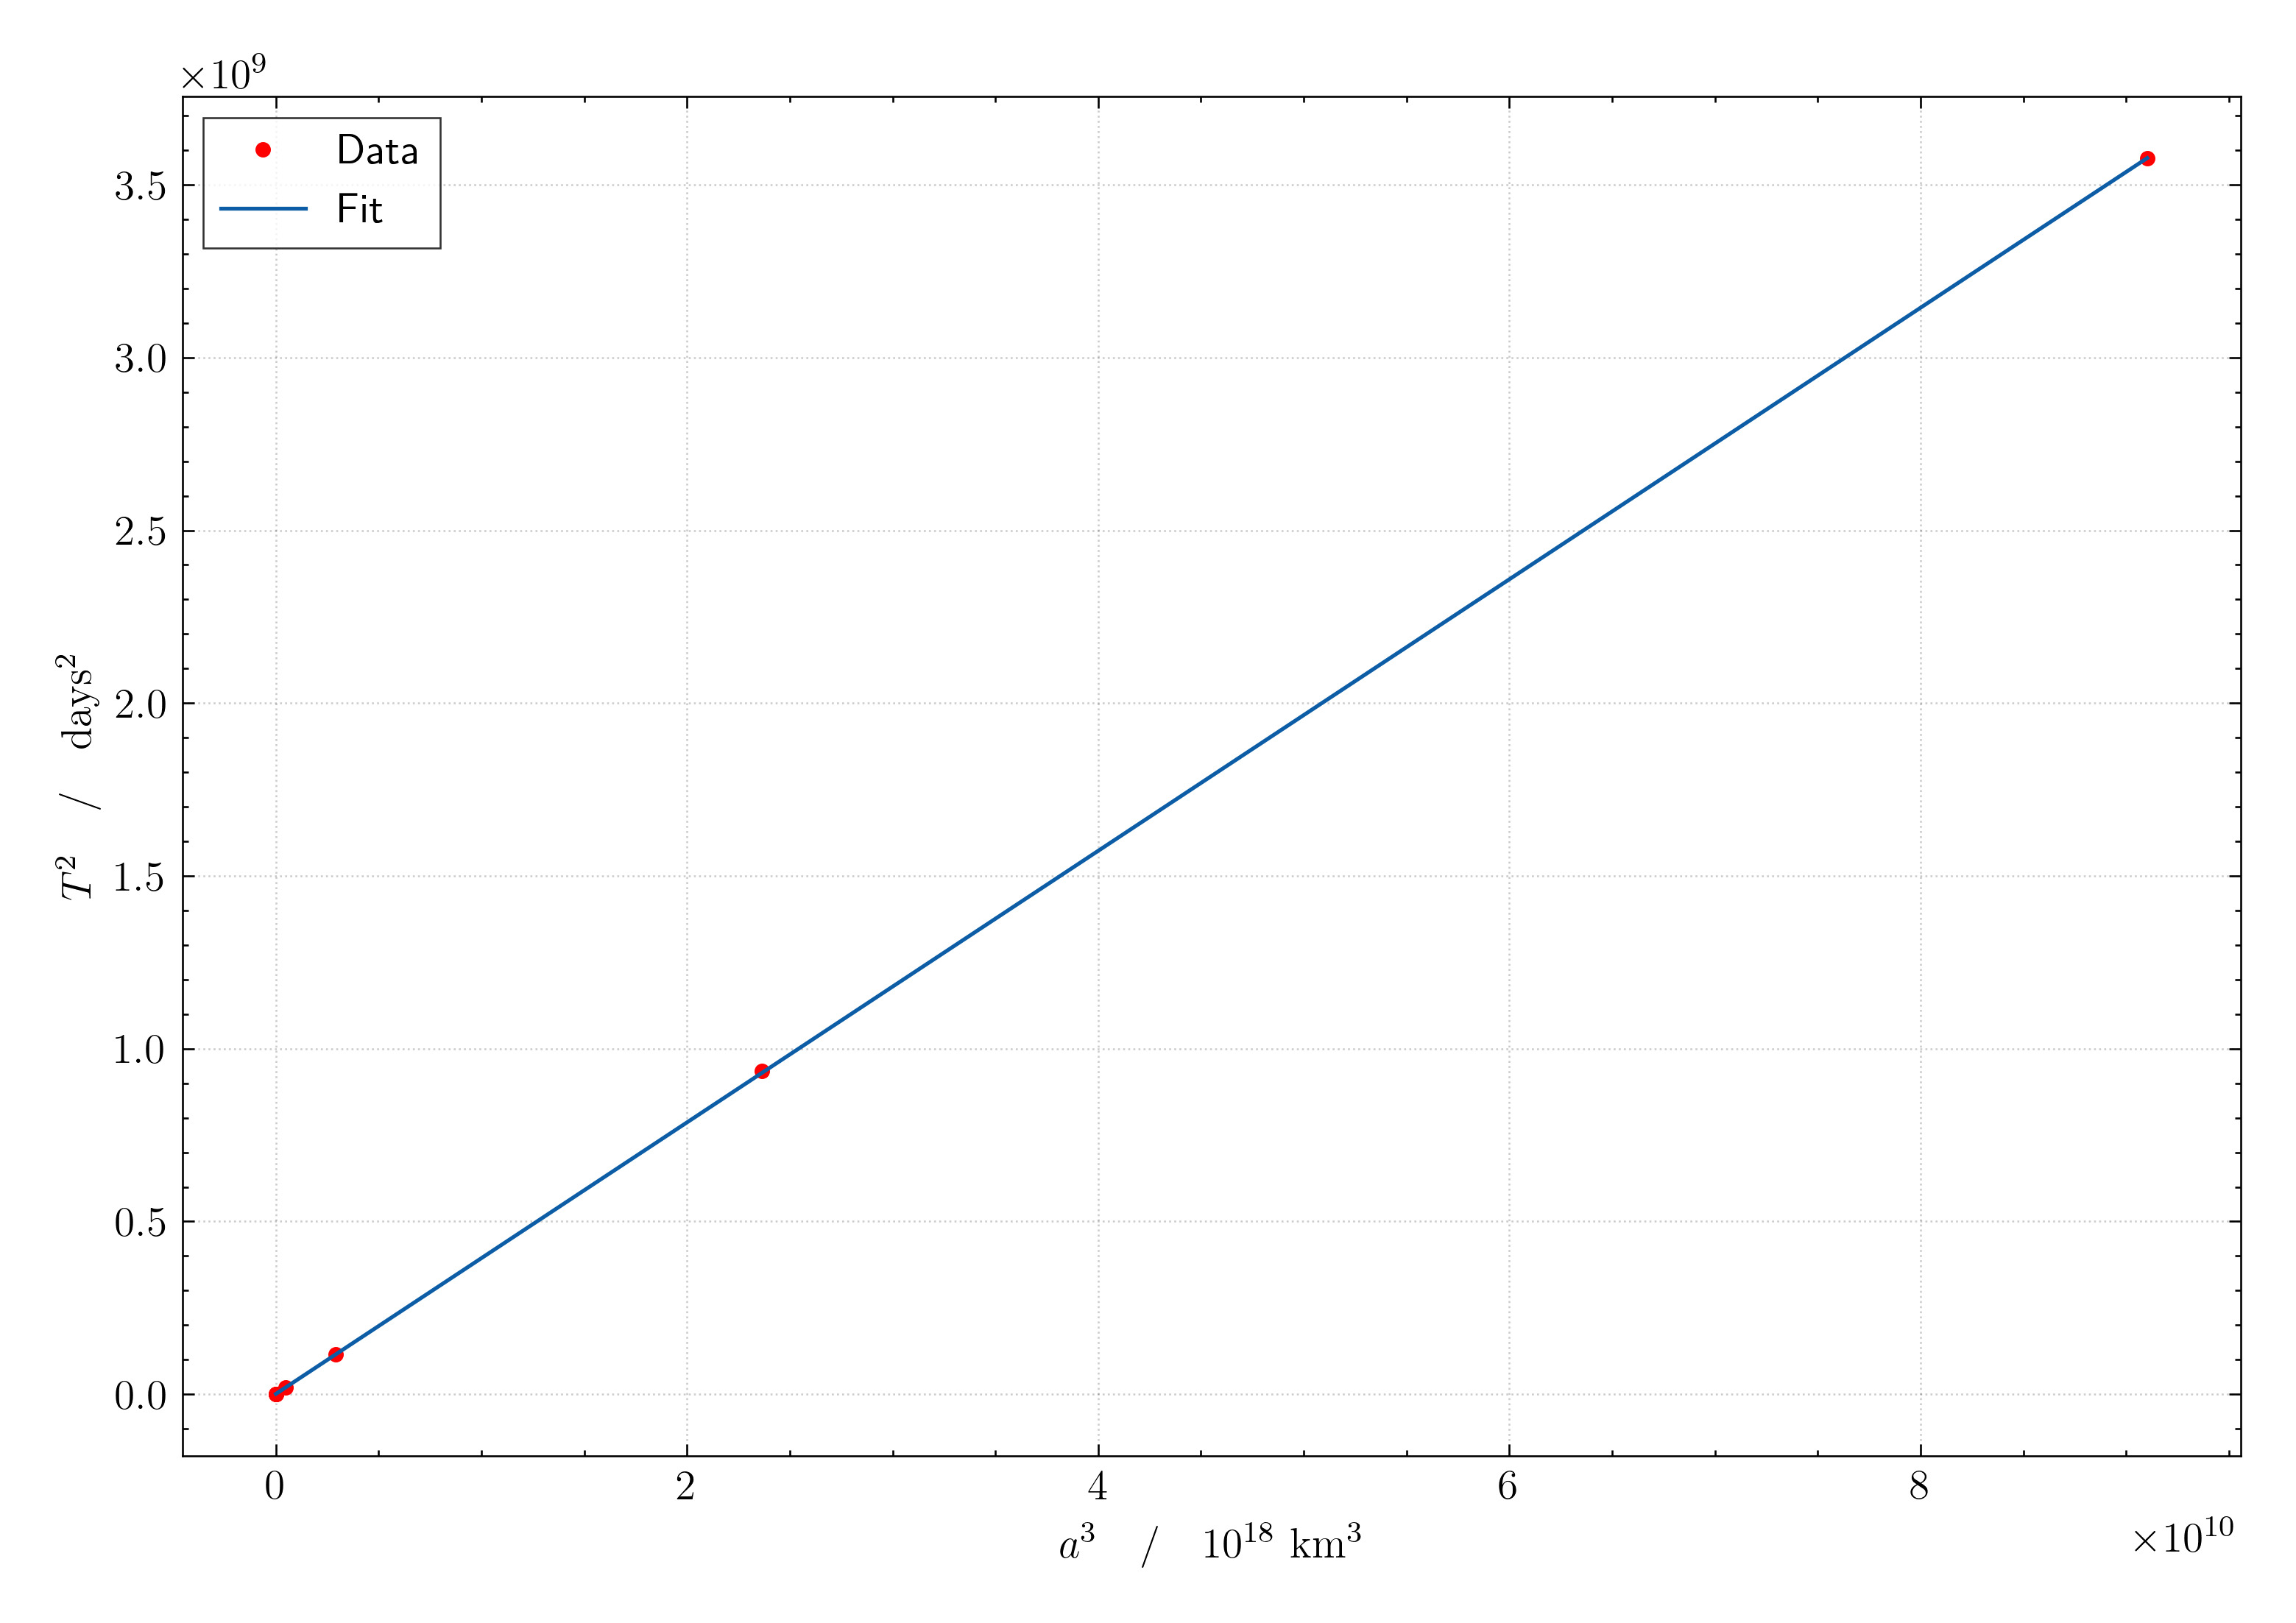

In [4]:
# Least squares fit
x = np.stack([np.ones(len(data)), data.a**3]).T
y = data['T'] ** 2
w = np.linalg.lstsq(x, y, rcond=None)[0]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r"$a^3\quad/\quad\mathrm{10^{18}\ km^3}$")
ax.set_ylabel(r"$T^2\quad/\quad\mathrm{days^2}$")
ax.plot(data.a**3, data['T']**2, 'r.', label="Data")
x = np.linspace((data.a**3).min(), (data.a**3).max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()
plt.show()

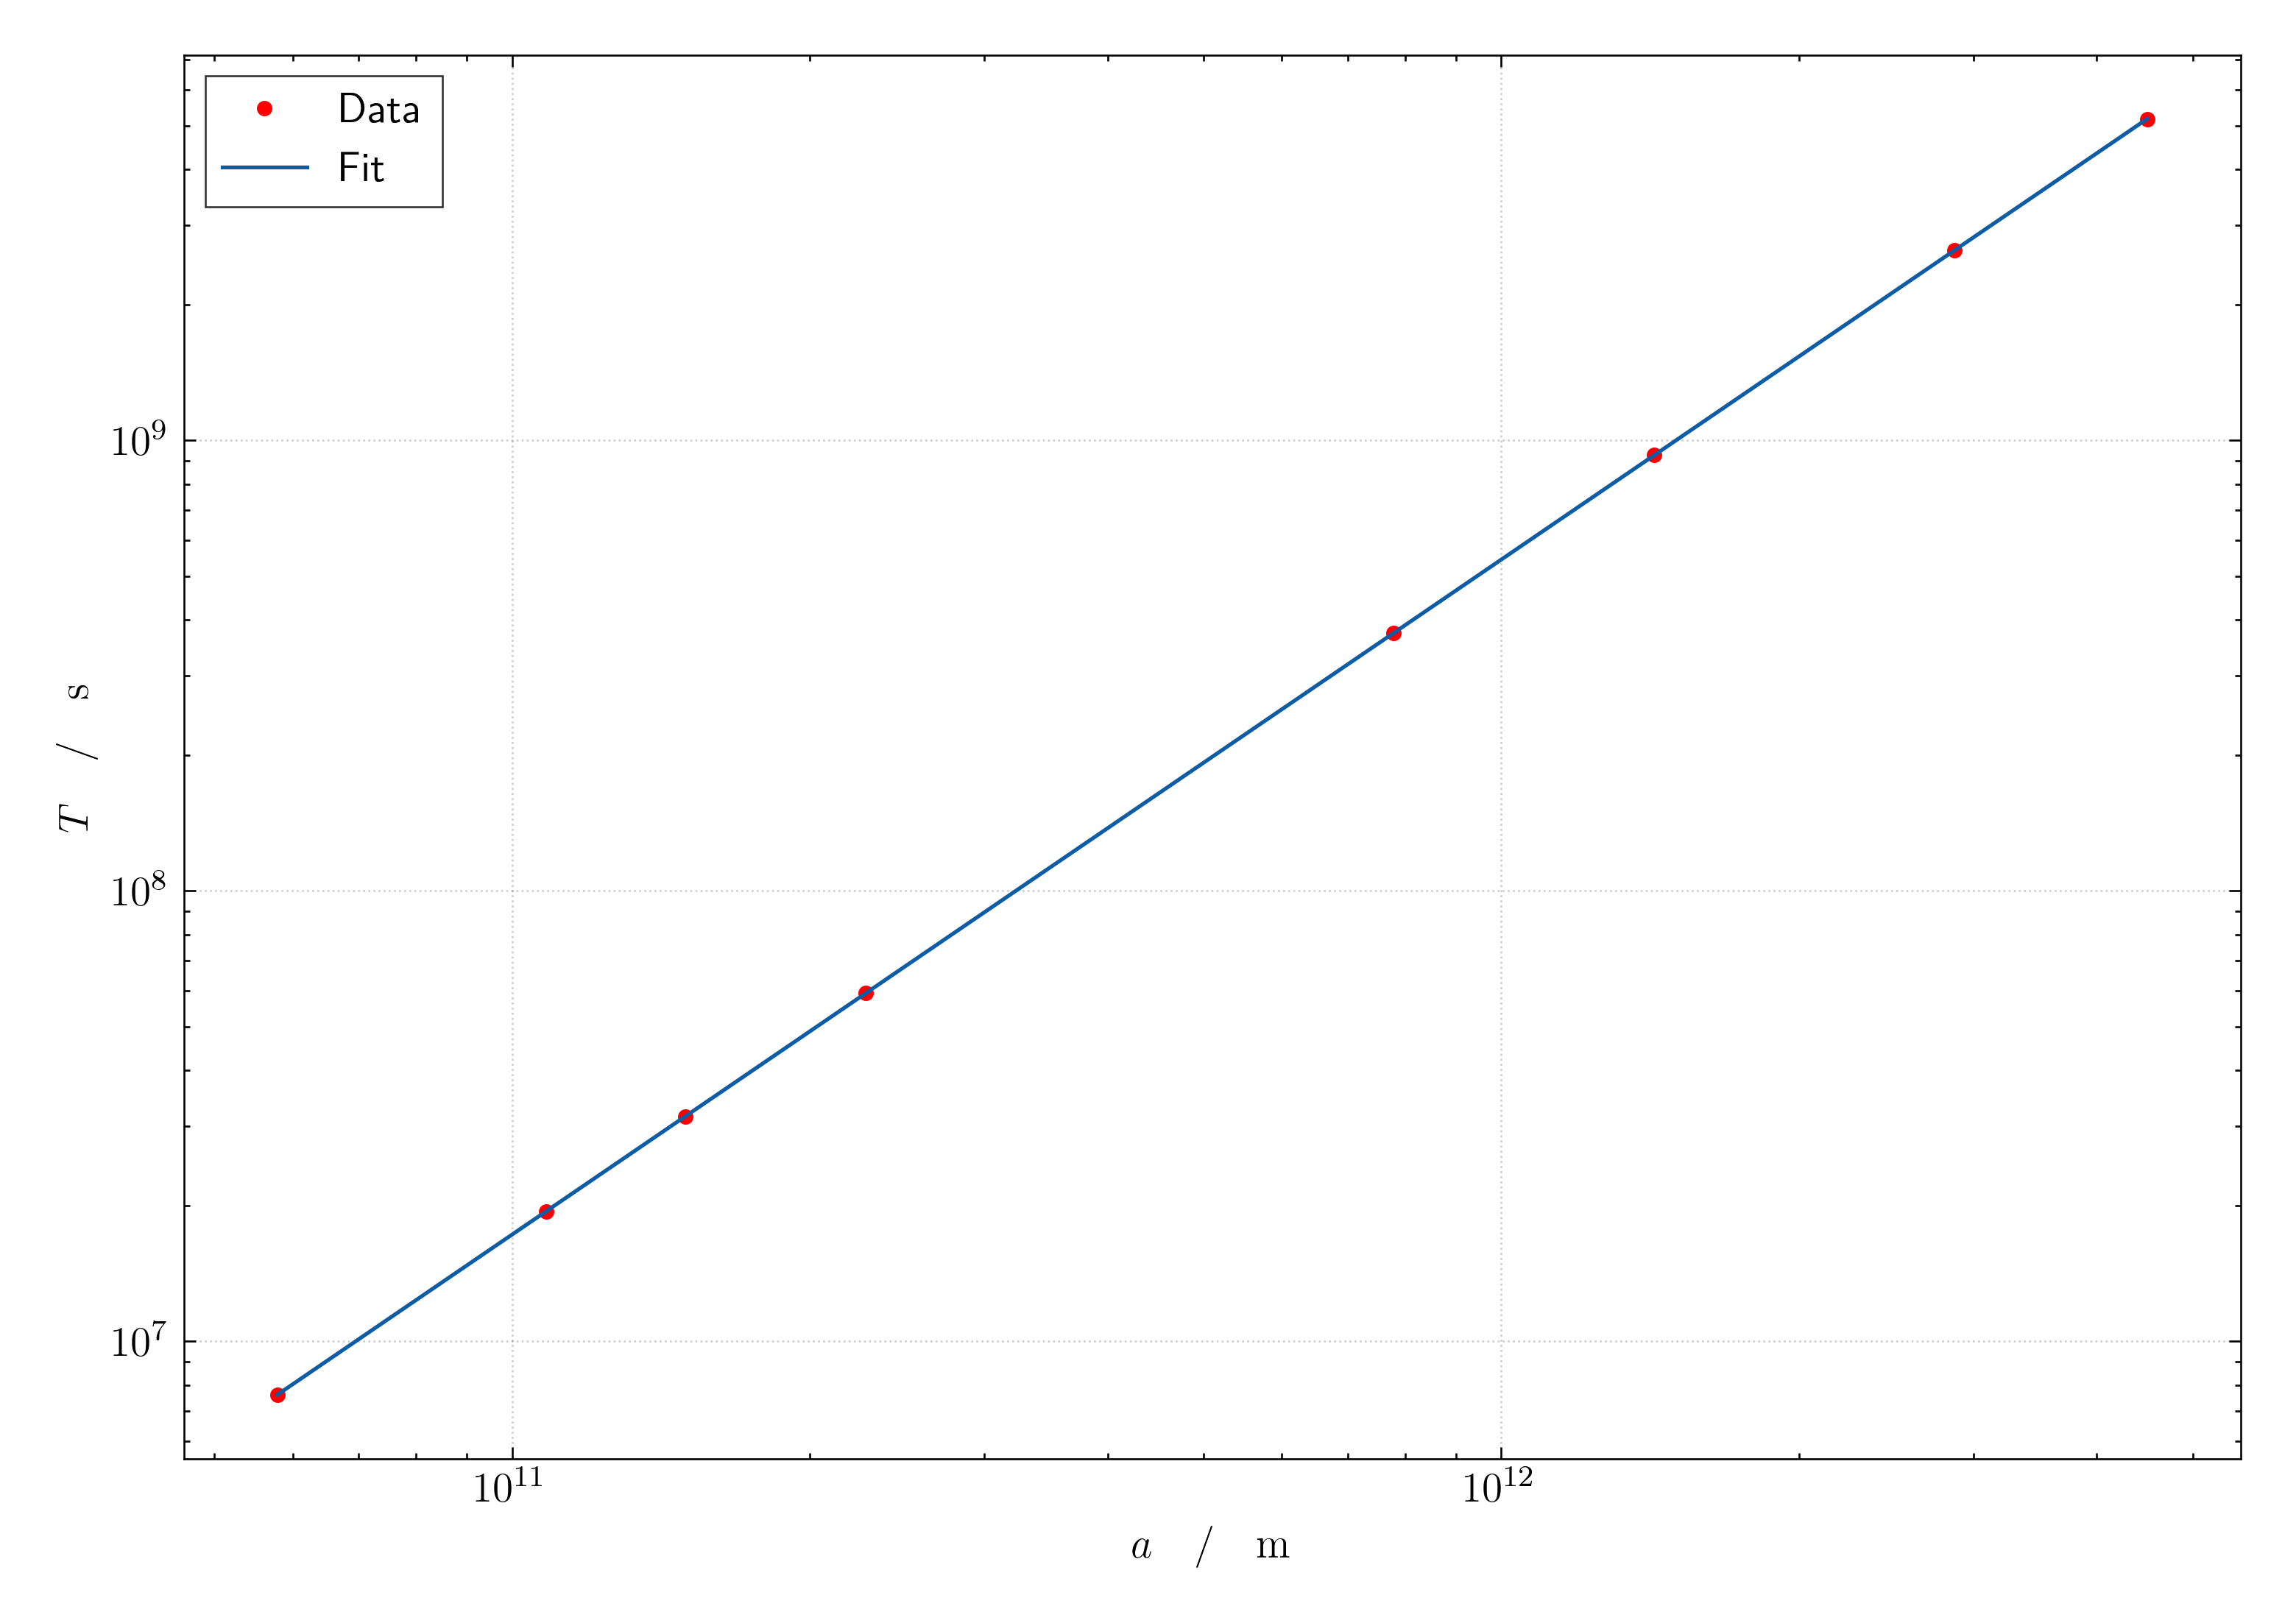

In [5]:
a = data.a * 10**9
T = data['T'] * 24 * 60 * 60

# Least squares fit
x = np.stack([np.ones(len(data)), np.log10(a)]).T
y = np.log10(T)
w = np.linalg.lstsq(x, y, rcond=None)[0]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r"$a\quad/\quad\mathrm{m}$")
ax.set_ylabel(r"$T\quad/\quad\mathrm{s}$")
ax.loglog(a, T, 'r.', label="Data")
x = np.linspace(np.log10(a).min(), np.log10(a).max())
ax.loglog(10**x, 10**sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()
plt.show()

In [6]:
print(f"Log-log slope: {w[1]:.3f}, error: {w[1] - 3/2:.3f})")

Log-log slope: 1.499, error: -0.001)


In [7]:
# Compute mass of sun
M_fit = 4 * np.pi**2 / (10**(2 * w[0]) * G)
print(f"Estimated mass of sun: {M_fit:.3g} kg, actual mass: {M:.3g}, error: {(M_fit - M) / M:.3f}%)")

Estimated mass of sun: 1.85e+30 kg, actual mass: 1.99e+30, error: -0.070%)


In [9]:
# Vesta
T = 1325.4 * 24 * 60 * 60
a = 10 ** ((np.log10(T) - w[0]) / w[1])
print(f"Estimated semi-major axis of Vesta (from data): {a:.3g} m")
a = np.cbrt(T**2 * G * M / 4 / np.pi**2)
print(f"Estimated semi-major axis of Vesta (accurate constants): {a:.3g} m")

Estimated semi-major axis of Vesta (from data): 3.54e+11 m
Estimated semi-major axis of Vesta (accurate constants): 3.53e+11 m
